# 548 20sp exam1 due 5p Fri May 1 on Canvas

***Please carefully review and compare this solution with your exam writeup.***
- I will accept regrade requests until midnight Sun May 17.
- To request a regrade, send one message to Prof Burden using [Canvas Conversations](https://canvas.uw.edu/conversations) specifying all of the problems you want regraded and your reason for requesting the regrade.
- ***Note that it is possible that a regrade request will result in a decrease in your exam score***, so be sure you understand the solution provided before making a request.
- To help you understand the problems and the solutions provided before you submit your request, Prof Burden is happy to answer questions during this week's class meetings.

4.0 <= scores <= 10.0
median score = 9.0


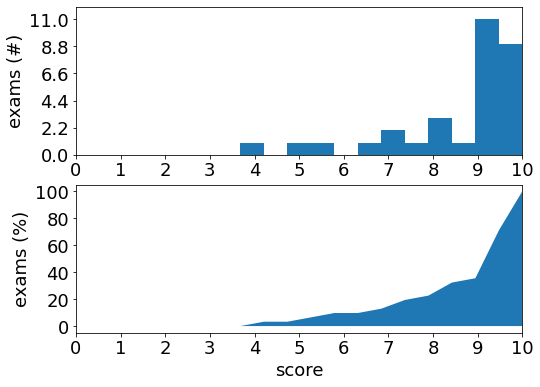

In [ ]:
import numpy as np
import pylab as plt

scores = np.array([ 4.  ,  5.25,  5.75,  6.75,  7.25,  7.25,  7.75,  8.25,  8.25,
                    8.25,  8.75,  9.  ,  9.  ,  9.  ,  9.  ,  9.  ,  9.  ,  9.  ,
                    9.  ,  9.  ,  9.  ,  9.25,  9.5 ,  9.5 ,  9.5 ,  9.5 ,  9.5 ,
                    9.75,  9.75, 10.  , 10.  ])

print('%0.1f <= scores <= %0.1f'%(scores.min(),scores.max()))
print('median score = %0.1f'%np.median(scores))

xlim = (0,10)
dxlim = xlim[1] - xlim[0]

plt.figure(figsize=(8,6))
plt.subplot(2,1,1)
h = plt.hist(scores,bins=np.linspace(xlim[0],xlim[1],2*dxlim))
n,s = h[0],h[1]
N = int(np.ceil(h[0].max()))
plt.ylim(0,N+1)
plt.xticks(np.linspace(xlim[0],xlim[1],dxlim+1))
plt.yticks(np.linspace(0,N,(N+2)//2))
plt.xlim(xlim)
plt.ylabel('exams (#)');

plt.subplot(2,1,2)
n *= 100./n.sum()
n = np.hstack((0.,n))
plt.fill_between(s,np.cumsum(n),0*n)
plt.xlim(xlim)
plt.xticks(np.linspace(xlim[0],xlim[1],dxlim+1))
plt.yticks(np.linspace(0,100,6))
plt.xlabel('score'); plt.ylabel('exams (%)');

# Setup
source: spr_548_lecture_examples

In [ ]:
# "magic" commands, prefaced with "%", changes settings in the notebook

# this ensures plots are embedded in notebook web page
%matplotlib inline

# pdb = Python debugger, so this command turns the debugger OFF
# %pdb off

# numpy = numerical Python, implements arrays (/ matrices)
import numpy as np
# limit number of decimal places printed for floating-point numbers
np.set_printoptions(precision=3)

# scipy = scientific Python, implements operations on arrays / matrices
import scipy as sp
# linalg = linear algebra, implements eigenvalues, matrix inverse, etc
from scipy import linalg as la
# optimize = optimization, root finding, etc
from scipy import optimize as op

# produce matlab-style plots
import matplotlib as mpl
# increase font size on plots
mpl.rc('font',**{'size':18})
# use LaTeX to render symbols
mpl.rc('text',usetex=False)
# animation
from matplotlib import animation as animation
from IPython.display import HTML
mpl.rc('animation', html='jshtml')
# Matlab-style plotting
import matplotlib.pyplot as plt

# symbolic computation, i.e. computer algebra (like Mathematica, Wolfram Alpha)
import sympy as sym

import pdb

# os = operating system; access OS-level commands
# e.g. create directory, delete file, execute command
# (more platform-independent than "!")
import os

# test whether this is a Colaboratory or Jupyter notebook
try:
  import google.colab
  COLAB = True
  print('Colaboratory Notebook')
except:
  COLAB = False
  print('Jupyter Notebook')

# Colab notebook
if COLAB:
  # pip = Python package manager; "!" means "run at system level"
  !pip install slycot
  !pip install control
  
  # render SymPy equations nicely in Colaboratory Notebook
  def colab_latex_printer(exp,**options):
    from google.colab.output._publish import javascript
    url = "https://cdnjs.cloudflare.com/ajax/libs/mathjax/2.7.3/latest.js?config=default"
    javascript(url=url)
    return sym.printing.latex(exp,**options)
  
  sym.init_printing(use_latex="mathjax",latex_printer=colab_latex_printer)

# Jupyter notebook
else:
  init_printing(use_latex='mathjax')

# Python's Control Systems Toolbox
import control as ctrl

# SciPy module that implements many of the routines in ctrl
from scipy import signal as sig

Colaboratory Notebook
     |████████████████████████████████| 1.5MB 2.8MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for slycot: filename=slycot-0.3.5-cp36-cp36m-linux_x86_64.whl size=1413040 sha256=074e33e29277b9bcb367eafe7efb223ef5fd3c2f133af3d1bce18b1000a1ad04
  Stored in directory: /root/.cache/pip/wheels/44/a0/1a/2357a505e49314f194d8de50d5ce0a87b368b323ce70b34d16
Successfully built slycot
     |████████████████████████████████| 256kB 2.8MB/s 
  Created wheel for control: filename=control-0.8.3-py2.py3-none-any.whl size=260982 sha256=5de938483c4912bc0a8fc38470f50b04aff280a0200e4cd5001a013bcbf16b40
  Stored in directory: /root/.cache/pip/wheels/c2/d9/cc/90b28cb139a6320a3af2285428b6da87eee8d8920c78bb0223
Successfully built control


In [ ]:
def numerical_simulation(f,t,x,t0=0.,dt=1e-4,ut=None,ux=None,utx=None,return_u=False):
  """
  simulate x' = f(t,x,u) 

  input:
    f : R x X x U --> X - vector field
      X - state space (must be vector space)
      U - control input set
    t - scalar - final simulation time
    x - initial condition; element of X

    (optional:)
    t0 - scalar - initial simulation time
    dt - scalar - stepsize parameter
    return_u - bool - whether to return u_

    (only one of:)
    ut : R --> U
    ux : X --> U
    utx : R x X --> U

  output:
    t_ - N array - time trajectory
    x_ - N x X array - state trajectory
    (if return_u:)
    u_ - N x U array - state trajectory
  """
  t_,x_,u_ = [t0],[x],[]
  
  inputs = sum([1 if u is not None else 0 for u in [ut,ux,utx]])
  assert inputs <= 1, "more than one of ut,ux,utx defined"

  if inputs == 0:
    assert not return_u, "no input supplied"
  else:
    if ut is not None:
      u = lambda t,x : ut(t)
    elif ux is not None:
      u = lambda t,x : ux(x)
    elif utx is not None:
      u = lambda t,x : utx(t,x)

  while t_[-1]+dt < t:
    if inputs == 0:
      _t,_x = t_[-1],x_[-1]
      dx = f(t_[-1],x_[-1]) * dt
    else:
      # pdb.set_trace()
      _t,_x,_u = t_[-1],x_[-1],u(t_[-1],x_[-1])
      dx = f(_t,_x,_u) * dt
      u_.append( _u )

    x_.append( _x + dx )
    t_.append( _t + dt )

  if return_u:
    return np.asarray(t_),np.asarray(x_),np.asarray(u_)
  else:
    return np.asarray(t_),np.asarray(x_)

# [insert your name]

(a) *Approximately how many hours did you spend on this exam?*

(b) *Were there specific problems that took much longer than others?*

(c) *What class meeting(s) / office hour(s) did you participate in this week?*

(d) *What timezone(s) were you working in this week?*

# problem 1:  optimization and linear-quadratic approximation

Consider the following optimization problem:

$$ \min_{u} c(x_+,x,u), \ c(x_+,x,u) = \frac{1}{2} x_+^2 + \frac{1}{20} u^2, $$

$$ x_+ = f(x,u) = \arctan(x + u), $$

where $x_+,x,u\in\mathbb{R}$ are all scalars.

In the next two problems, we will regard this optimization problem as a general nonlinear programming problem.


(a) *The first-order necessary condition that must be satisfied for $u_0$ to be stationary for a given $x$ is $D_u c = 0$ -- compute this derivative, substituting and simplifying as much as possible.*

**solution:**

Substituting the function $x_+$ into the cost function:

$$c(x_+,x,u) = \frac{1}{2} \arctan^2(x + u) + \frac{1}{20} u^2$$

Using chain rule:
$$Dc_u = \arctan(x + u). \frac{1}{1 + (x+u)^2} + \frac{1}{10} u$$

$$= \frac{\arctan(x + u)}{1 + (x+u)^2} + \frac{1}{10} u$$


Verifying derivative using SymPy:

In [ ]:
import sympy as sym

x_p,x,u = sym.var('x_+ x u')

f = sym.atan(x+u)

c = (x_p**2/2 + u**2/20).subs(x_p,f)

Dc = sym.diff(c,u,1)

print('Derivative of cost wrt u =', Dc)

Derivative of cost wrt u = u/10 + atan(u + x)/((u + x)**2 + 1)


(b) *Use the derivative computed in (a) to implement an algorithm that approximates the stationary point $u_0(x)$.  Plot the stationary $u_0(x)$, corresponding cost, and second derivative of the cost on the range $x\in(-1,+1)$ (evaluate $c$ and $D^2 c$ at the stationary point for each $x$).  Use ``subplot(3,1,N)`` and label axes.*

***Hint:*** you cannot solve for the stationary point analytically in (a), but it should be straightforward to approximate numerically in (b).

**Solution:**

Using Sympy to evaluate the derivatives numerically:

In [ ]:
c_ = sym.lambdify((x,u),c)

Dc_ = sym.lambdify((x,u),Dc)

D2c = sym.diff(c,u,2)
D2c_ = sym.lambdify((x,u),D2c)

Then approximating the stationary point using gradient descent $u^+ = u - \alpha Dc(u)$.

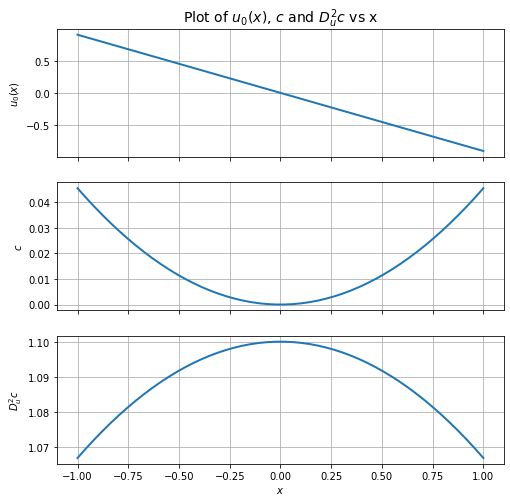

In [ ]:
import numpy as np

X = np.linspace(-1,1)

a = 5e-1
I = 1000
U = np.zeros((I,X.size))

for i in range(I-1):
  # gradient descent -- note that this is "vectorized", 
  # i.e. this descends for all x in one line of code
  U[i+1] = U[i] - a * Dc_(X,U[i])

# confirm that the final points are stationary to 2 decimal places
#assert np.allclose(Dc_(X,U[-1]),0,atol=1e-2)

plt.figure(figsize=(8,8));
ax = plt.subplot(3,1,1)
plt.title(r'Plot of $u_0(x)$, $c$ and $D_u^2 c$ vs x',fontsize=14)
ax.plot(X,U[-1],linewidth=2)
ax.set_xticklabels([])
ax.set_ylabel(r'$u_0(x)$')
plt.grid()

ax = plt.subplot(3,1,2)
ax.plot(X,c_(X,U[-1]),linewidth=2)
ax.set_xticklabels([])
ax.set_ylabel(r'$c$')
plt.grid()

ax = plt.subplot(3,1,3)
ax.plot(X,D2c_(X,U[-1]),linewidth=2)
ax.set_ylabel(r'$D_u^2 c$')
ax.set_xlabel(r'$x$');
plt.grid()


In the remaining problems, we will regard the optimization problem as an optimal control problem on a time horizon of a single timestep.


(c) *Linearize the difference equation about the origin, i.e. compute the first-order approximation to $f$ and evaluate it at the equilibrium $(x_e,u_e) = (0,0)$.*

**Solution:**

Using Sympy to linearize the system about the equilibrium:


In [ ]:
Dxf = sym.diff(f,x)
Duf = sym.diff(f,u)

equil = {x:0,u:0}

A = Dxf.subs(equil)
B = Duf.subs(equil)

print('A =', A, ', B =', B)

A = 1 , B = 1


(d) *Quadraticize the cost about the origin, i.e. compute the second-order approximation to $c$ and evaluate it at the equilibrium from (c).*

**Solution:**

Using Sympy to compute the second order derivative of cost wrt $x_+$, $x$ and $u$:


In [ ]:
c = (x_p**2/2 + u**2/20)#.subs(x_p,f)
Dxp2c = sym.diff(c,x_p,2)
Dx2c = sym.diff(c,x,2)
Du2c = sym.diff(c,u,2)

P1 = Dxp2c.subs(equil)
Q = Dx2c.subs(equil)
R = Du2c.subs(equil)

print('P1 =', P1, ', Q =', Q, ', R =', R)

P1 = 1 , Q = 0 , R = 1/10


In [ ]:
# converted LQ regulator formulas to scalar case
K = B*P1*A/(B*P1*B + R)
P0 = P1*(A - B*K)**2 + K*R*K + Q

print('K =', K, ', P0 =', P0)

K = 10/11 , P0 = 1/11


(e) *Solve the linear-quadratic optimal control problem obtained using dynamics from (c) and cost from (d).  Plot the optimal control and optimal value on the range $x\in(-1,+1)$, and overlay plots of the stationary $u_0(x)$ and corresponding cost from (b).  Use ``subplot(2,1,N)``, label axes, and include a legend.*

***Hint:*** the linear-quadratic optimal control problem can be solved analytically in (d) -- though you are welcome to solve it numerically -- and the solution provides an approximation to the original problem (i.e. the graphs in (e) should look similar near the origin).

**Solution:**

Using the $K$ computed in (d) such that $u = -Kx$

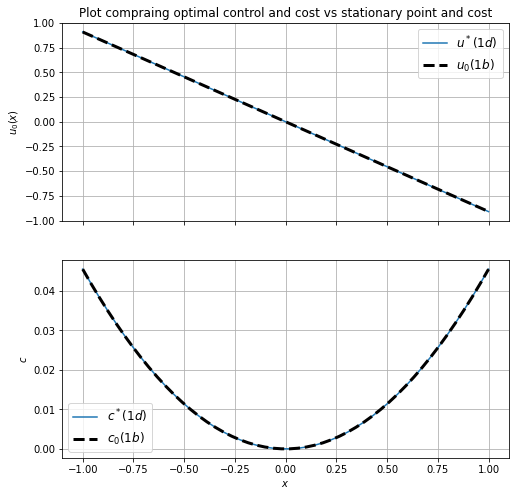

In [ ]:
fig = plt.figure(figsize=(8,8));
ax = plt.subplot(2,1,1)
plt.title(r'Plot compraing optimal control and cost vs stationary point and cost')
ax.plot(X,-K*X,label=r'$u^* (1d)$')
ax.plot(X,U[-1],'k--',lw=3,label='$u_0 (1b)$')
ax.set_xticklabels([])
ax.set_ylabel(r'$u_0(x)$')
plt.legend(fontsize=12)
plt.grid()

ax = plt.subplot(2,1,2)
ax.plot(X,P0*X**2/2, label=r'$c^* (1d)$')
ax.plot(X,c_(X,U[-1]),'k--',lw=3, label=r'$c_0(1b)$')
ax.set_ylabel(r'$c$')
ax.set_xlabel(r'$x$')
plt.legend(fontsize=12)
plt.grid()

# problem 2:  robustness of LQ regulators

Consider the simplified vertical-plane quadrotor model
$$ M\ddot{\eta} = F\sin\theta - \beta \dot{\eta}, $$
$$ M\ddot{\nu} = -Mg + F\cos\theta - \beta \dot{\nu}, $$
$$ I\ddot{\theta} = \tau - \gamma \dot{\theta}$$
where ($\eta$, $\nu$) denote the quadrotor (horizontal, vertical) position and $\theta$ denotes the quadrotor's rotation, ($M$, $I$) denote quadrotor (mass, inertia), $g$ is acceleration due to gravity, $\beta,\gamma > 0$ are damping coefficients, and ($F$, $\tau$) denote the net (thrust, torque) applied by the spinning rotors.



(a) *Linearize the differential equation about the operating point $x_0 = 0$, $u_0 = (M g, 0)$, which is an equilibrium; provide the $A, B$ matrices that determine how the states vary in time with respect to state and input.  Use state $x = (q,\dot{q})$ and input $u = (F,\tau)$ where $q = (\eta,\nu,\theta)$.*


***Hint:*** this is a lightly-modified version of the quadrotor model provided in the course's Python lecture notebook -- you are welcome to reuse code from that example (with appropriate modifications).

**Solution:**

Let $\dot{q} = w$ such that the state vector is $x = (q, w)\in\mathbb{R}^6$,
the input vector is $u = (F,\tau)\in\mathbb{R}^2$,
and the state-space model is
$$ \dot{x} = \frac{d}{dt}\left[\begin{array}{c} q \\ \dot{q} \end{array}\right] = \left[\begin{array}{c} \dot{q} \\ \ddot{q}(x,u) \end{array}\right] = \left[\begin{array}{c} \dot{q} \\ \dot{w}(x,u) \end{array}\right] =f(x,u), $$
where $\dot{w} : \mathbb{R}^6 \times \mathbb{R}^2 \rightarrow \mathbb{R}^3$ is defined by 
$$\dot{w}(x,u) = \left[\begin{array}{c} \frac{F}{M}\sin\theta - \frac{\beta}{M} \dot{\eta} \\ -g + \frac{F}{M}\cos\theta - \frac{\beta}{M} \dot{v}\\ \frac{\tau}{I} - \frac{\gamma}{I} \dot{\eta}\end{array}\right].$$ 

Linearizing
$$A(x,u) 
= 
\left[\begin{array}{c} \frac{\delta f_1}{\delta q} &  \frac{\delta f_1}{\delta w}\\ \frac{\delta f_2}{\delta q} &  \frac{\delta f_2}{\delta w} \end{array}\right] 
= 
\left[\begin{array}{c} 0 & 0 & 0 & 1 & 0 & 0\\ 
0 & 0 & 0 & 0 & 1 & 0\\
0 & 0 & 0 & 0 & 0 & 1\\
0 & 0 & \frac{F}{M}\cos\theta & -\frac{\beta}{M} & 0 & 0 \\ 
0 & 0 & -\frac{F}{M}\sin\theta & 0 & -\frac{\beta}{M} & 0 \\ 
0 & 0 & 0 & 0 & 0 & - \frac{\gamma}{I}\\
\end{array}\right]$$
Evaluating at equilibrium $x_0 = 0$, $u_0 = (M g, 0)$
$$A(x_0,u_0) 
= 
\left[\begin{array}{c} \frac{\delta f_1}{\delta q} &  \frac{\delta f_1}{\delta w}\\ \frac{\delta f_2}{\delta q} &  \frac{\delta f_2}{\delta w} \end{array}\right] 
= 
\left[\begin{array}{c} 0 & 0 & 0 & 1 & 0 & 0\\ 
0 & 0 & 0 & 0 & 1 & 0\\
0 & 0 & 0 & 0 & 0 & 1\\
0 & 0 & g & -\frac{\beta}{M} & 0 & 0 \\ 
0 & 0 & 0 & 0 & -\frac{\beta}{M} & 0 \\ 
0 & 0 & 0 & 0 & 0 & - \frac{\gamma}{I}\\
\end{array}\right]$$
and
$$B(x,u) 
= 
\left[\begin{array}{c} \frac{\delta f_1}{\delta u} \\ \frac{\delta f_2}{\delta u} \end{array}\right] 
= 
\left[\begin{array}{c} 0 & 0\\ 0 & 0\\ 0 & 0\\ 
\frac{1}{M}\sin\theta & 0\\ \frac{1}{M}\cos\theta & 0\\
0 & \frac{1}{I}
\end{array}\right]$$

Evaluating at equilibrium $x_0 = 0$, $u_0 = (M g, 0)$
$$B(x_0,u_0) 
= 
\left[\begin{array}{c} \frac{\delta f_1}{\delta u} \\ \frac{\delta f_2}{\delta u} \end{array}\right] 
= 
\left[\begin{array}{c} 0 & 0\\ 0 & 0\\ 0 & 0\\ 
0& 0\\ \frac{1}{M} & 0\\
0 & \frac{1}{I}
\end{array}\right]$$



***Notes:***
* although the state vector was specified as $x = (q,\dot{q})$, you should receive full credit if the correct $A$ and $B$ were determined for any other ordering of the states;
* a common mistake was to forget to divide $F$ by $M$ and $\tau$ by $I$ to determine $B$.

Use parameter values $M = 2$ kg, $I = 2/12$ kg m$^2$, $g = 9.81$ m sec$^{-2}$, $\beta = 1$, $\gamma = 1/10$ in the remainder of the problem.

(b) *Solve the infinite-horizon linear-quadratic optimal control problem defined by the dynamics from (a) and the state- and input-cost matrices $Q = I$, $R = I$; provide the $P, K$ matrices that define the optimal value and corresponding state feedback law.* 

***Hint:*** you can choose whether to do this in continuous- or discrete-time, and whether to approximate the solution by simulating the *differential Riccati equation* or by solving the *algebraic Riccati equation* -- each approach should give approximately the same answer; you could use this fact to sanity-check your solution. 

**Solution:**

In [ ]:
import numpy as np

# variables
M, I, g, beta, gamma = 2, 2/12, 9.81, 1, 1/10
n_states = 6
m_inputs = 2

# System matrices
A = np.array([[0, 0, 0, 1, 0, 0],
              [0, 0, 0, 0, 1, 0],
              [0, 0, 0, 0, 0, 1],
              [0, 0, g, -beta/M, 0, 0],
              [0, 0, 0, 0, -beta/M, 0],
              [0, 0, 0, 0, 0, -gamma/I]])
B = np.array([[0, 0],
              [0, 0],
              [0, 0],
              [0, 0],
              [1/M, 0],
              [0, 1/I]])


print('A =\n',A,'\n','B =\n',B)

A =
 [[ 0.    0.    0.    1.    0.    0.  ]
 [ 0.    0.    0.    0.    1.    0.  ]
 [ 0.    0.    0.    0.    0.    1.  ]
 [ 0.    0.    9.81 -0.5   0.    0.  ]
 [ 0.    0.    0.    0.   -0.5   0.  ]
 [ 0.    0.    0.    0.    0.   -0.6 ]] 
 B =
 [[0.  0. ]
 [0.  0. ]
 [0.  0. ]
 [0.  0. ]
 [0.5 0. ]
 [0.  6. ]]


In [ ]:
Q = np.eye(n_states)
R = np.eye(m_inputs)

# using continuous time algeraic Ricatti equation
P,_,K = ctrl.care(A,B,Q,R) 
print('P =\n',P,'\n','K =\n',K)

P =
 [[ 1.593  0.     1.795  0.676  0.     0.167]
 [ 0.     2.449 -0.    -0.     2.     0.   ]
 [ 1.795 -0.     9.847  2.19  -0.     1.105]
 [ 0.676 -0.     2.19   0.777 -0.     0.209]
 [ 0.     2.    -0.    -0.     2.899  0.   ]
 [ 0.167  0.     1.105  0.209  0.     0.282]] 
 K =
 [[0.    1.    0.    0.    1.449 0.   ]
 [1.    0.    6.631 1.255 0.    1.695]]


***Notes:***
* if the $A$ and $B$ matrices from (a) are used, then the *continuous-time* Riccati equation / solver must be used to determine $P$ and $K$, not the *discrete-time* equation / solver.


(c) *Choose a nonzero state perturbation $\Delta x$ and apply the full-state feedback controller from (b) from initial state $\delta x = \alpha\cdot \Delta x$ for $\alpha \in (-1,+1)$ on time horizon $t = 1$.  Plot the cost incurred as a function of $\alpha$, and overlay a plot of the optimal value determined in (b).  Label axes and include a legend.*

***Hint:*** the actual cost incurred should be similar, but not identical, to the optimal value.

**Solution:**
For the continuous time system:

$$\delta \dot{x} = A \delta x + B \delta u$$

using full-state feedback control: $\delta u = -K \delta x$, then
$$\delta \dot{x} = (A - BK)\delta x$$

The total cost for an infinite time horizon continous time lqr:
$$c = \int_{t=0}^{\infty} \left(\frac{1}{2} \delta x^T Q  \delta x + \frac{1}{2} \delta u^T R \delta u \right) d \tau$$
$$ = \int_{t=0}^{\infty} \left(\frac{1}{2} \delta x^T Q  \delta x + \frac{1}{2} \delta (-K \delta x)^T R (-K \delta x) \right) d \tau$$
$$ = \int_{t=0}^{\infty} \left(\frac{1}{2} \delta x^T Q  \delta x + \frac{1}{2} \delta x^T (K^T R K) \delta x\right) d \tau$$
$$ = \int_{t=0}^{\infty} \left(\frac{1}{2} \delta x^T (Q + K^T R K) \delta x \right) d \tau$$
$$\therefore c = \int_{t=0}^{\infty} \frac{1}{2} \delta x^T \tilde{Q} \delta x \ d \tau \approx \sum_{k = 0}^{\infty} \frac{1}{2} \Delta x^T \tilde{Q} \Delta x .$$




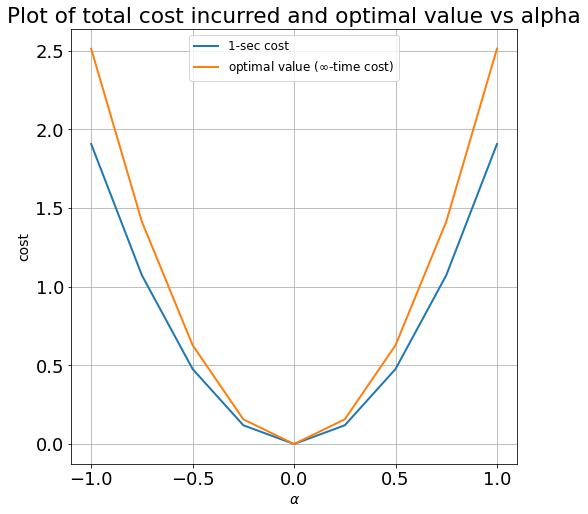

In [ ]:
# Linearized system
def f_LTI(tau,delta_x,delta_u):
  # x is a 1-D array, i.e. a "row", so we left-multiply the transpose of (A-BK)
  return np.dot(delta_x,(A-np.dot(B,K)).T)

# input is defined as 0 since state feedback is used in state space
delta_u0 = lambda tau: 0

# linearized simulation
dt = 1e-2
t = 1. 
del_q0 = 0.5 * np.ones(int(n_states/2))
del_dq0 = 0.1 * np.ones(int(n_states/2))
del_x0 = np.hstack((del_q0.T,del_dq0.T))
# pdb.set_trace()
alpha_range = np.linspace(-1, 1, 9, endpoint=True)

Q_tilde = Q + np.dot(K.T, np.dot(R,K))
cost = np.empty_like(alpha_range)
opt_val = np.empty_like(alpha_range)
for idx1, alpha in enumerate(alpha_range):
  delta_x0 = alpha * del_x0
  t_,dx = numerical_simulation(f_LTI,t,delta_x0,dt=dt,ut=delta_u0)
  cost_state = 0
  for _, x in enumerate(dx):
    cost_state += dt * 0.5 * np.dot(np.dot(x, Q_tilde), x.T) 
  
  cost[idx1] = cost_state # cost incurred for each alpha
  opt_val[idx1] = 0.5 * np.dot(np.dot(delta_x0, P), delta_x0.T) # optimal value

 
fig = plt.figure(figsize=(8,8));
plt.title(r'Plot of total cost incurred and optimal value vs alpha')
plt.plot(alpha_range, cost,linewidth=2,label=r'1-sec cost')
plt.plot(alpha_range, opt_val,linewidth=2,label=r'optimal value ($\infty$-time cost)')
plt.xlabel(r'$\alpha$',fontsize=14)
plt.ylabel(r'cost',fontsize=14)
plt.legend(fontsize=12)
plt.grid()

***Notes:***
* since the controller is only applied on a finite time horizon (1 sec), the cost should be larger than the optimal value (which is the $\infty$-horizon cost).

In the following problems, we regard the process $P$ as a system that inputs the thrust and torque applied by the spinning rotors and outputs the full system state; similarly, we regard the controller $C$ synthesized in (b) as a system that inputs the full system state and outputs rotor thrust and torque.

(d) *Bode plot the $(\eta,\theta)$ and $(\nu,\theta)$ components of the sensitivity transfer matrix $S = (I + PC)^{-1}$ that quantify how perturbations to the angle measurement $\theta$ affect the horizontal $\eta$ and vertical $\nu$ position.*

**Solution:**

Converting from state space to transfer function using
$$P(s)\cdot C(s) = [C(sI - A)^{-1}B + D] \cdot K $$
If the output of the system is the full state and there is no feed forward, then $C = I$ and $D = 0$
$$\therefore P(s)C(s) = (sI - A)^{-1}BK $$

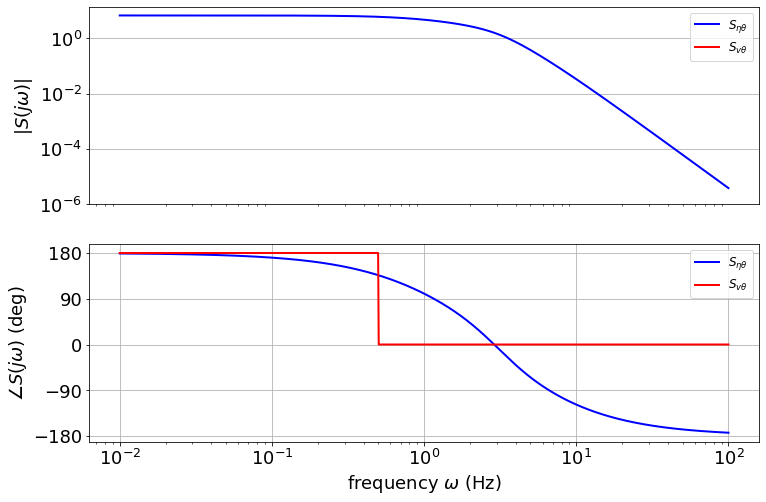

In [ ]:
# SS to tf
def S(s, r_eta, r_v, c_theta):
  # pdb.set_trace()
  Amod = np.linalg.inv(s*np.eye(n_states) - A)
  PC = np.dot(Amod, np.dot(B,K))
  S_s = np.linalg.inv(np.eye(n_states) + PC)

  return S_s[r_eta,c_theta], S_s[r_v,c_theta]

# omega = np.linspace(0.75,1e1,1000)
#omega = np.linspace(1.13,1.14,1000)
omega = np.logspace(-2,2,1000)

r_eta, r_v = 0,1 # Eta is the first, v is the second and theta is the third state
c_theta = 2
S_eta = np.empty([omega.size],dtype=np.complex) # Sensitivity of eta vs theta
S_v = np.empty([omega.size],dtype=np.complex) # Sensitivity of v vs theta
for idx in range(omega.size):
  S_eta[idx], S_v[idx] = S(1.j*omega[idx], r_eta, r_v, c_theta)

abs_S_eta = np.abs(S_eta)
angle_S_eta = np.unwrap(np.angle(S_eta))*180./np.pi
abs_S_v = np.abs(S_v)
angle_S_v = np.unwrap(np.angle(S_v))*180./np.pi

# plots
plt.figure(figsize=(12,8)); axs = []
ax = plt.subplot(2,1,1); ax.grid(True)
ax.loglog(omega,abs_S_eta,'b-',lw=2,label=r'$S_{\eta \theta}$')
ax.loglog(omega,abs_S_v,'r-',lw=2,label=r'$S_{v \theta}$')
ax.set_ylabel(r'$|S(j\omega)|$')
ax.set_yticks([10**-6,10**-4,10**-2,10**0])
ax.set_xticks([])
# ax.set_xlim(xlim)
axs.append(ax)
plt.legend(fontsize=12)

ax = plt.subplot(2,1,2); ax.grid(True)
ax.semilogx(omega,angle_S_eta,'b-',lw=2,label=r'$S_{\eta \theta}$')
ax.semilogx(omega,angle_S_v,'r-',lw=2,label=r'$S_{v \theta}$')
ax.set_xlabel(r'frequency $\omega$ (Hz)')
ax.set_ylabel(r'$\angle S(j\omega)$ (deg)')
ax.set_yticks([180,90,0,-90,-180])
# ax.set_xlim(xlim)
axs.append(ax)
plt.legend(fontsize=12)

***Notes:***
* $C(s) = K$ should be used when evaluating the sensitivity, not $C(s) = -K$, since the minus sign is already incorporated in the (negative) feedback pathway in the block diagram used to derive the sensitivity transfer matrix $S$; this mistake causes a local minimum to appear in the phase plot around $\omega = 10^1$ Hz;
* $S_{\eta,\theta}$ is identically zero, so it was OK to state this without providing a Bode plot; it was also OK to provide the Bode plot without observing that the transfer function is zero.


(e) *Determine the gain and phase margins of the $(\eta,\theta)$ and $(\nu,\theta)$ loops.*



**Solution:**

We determine stability margins from the Nyquist plot of the $(\eta,\theta)$ and $(\nu,\theta)$ components of the transfer matrix $L(s) = P(s) C(s)$.

In [ ]:
def L(s, r_eta, r_v, c_theta):
  # pdb.set_trace()
  Amod = sp.linalg.inv(s*np.eye(n_states) - A)
  PC = np.dot(Amod, np.dot(B,K))

  return PC[r_eta,c_theta], PC[r_v,c_theta]

omega = np.logspace(-2,2,1000)

r_eta, r_v = 0,1 # Eta is the first, v is the second and theta is the third state
c_theta = 2
L_eta = np.empty([omega.size],dtype=np.complex) # Open loop tf of eta vs theta
L_v = np.empty([omega.size],dtype=np.complex) # Open loop tf v vs theta
for idx in range(omega.size):
  L_eta[idx], L_v[idx] = L(1.j*omega[idx], r_eta, r_v, c_theta)

For the $(\eta,\theta)$ component, the gain margin is $g_m = \infty$ and the phase margin is $\varphi_m = 166$ deg.

g_m = inf, phi_m = 166 deg


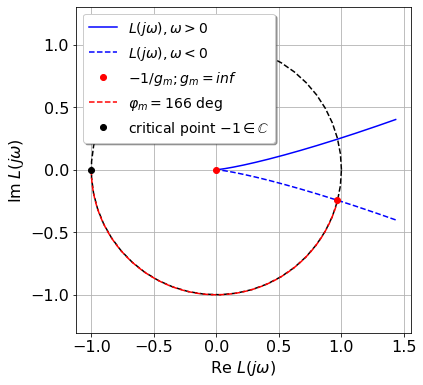

In [ ]:
Omega = L_eta[650:]

abs_L = np.abs(Omega)
angle_L = np.unwrap(np.angle(Omega))*180./np.pi
angle_L = (np.angle(Omega))*180./np.pi

circle = np.exp(1.j*np.linspace(0.,2*np.pi))

# index (i.e. entry) of Omega array corresponding to stability margin
if len((angle_L < -180).nonzero()) > 1:
  g_m_idx = (angle_L < -180).nonzero()[0][0]
  g_m = -1./Omega[g_m_idx].real
else:
  g_m = np.inf
phi_m_idx = np.argmin(np.min(np.abs(np.conj(Omega) - circle[:,np.newaxis]),axis=0))
s_m_idx = np.argmin(np.abs(Omega - (-1.)))

# numerical value of stability margin
phi_m = np.angle(np.conj(Omega)[phi_m_idx])*180./np.pi
phi_m_arc = np.exp(1.j*np.linspace(-180,phi_m)*np.pi/180.)
s_m = np.abs(Omega[s_m_idx] - (-1.))

print('g_m = %0.2f, phi_m = %0.f deg'%(g_m,180+phi_m))

axs = []

plt.figure(figsize=(6,6))
ax = plt.subplot(1,1,1); ax.grid('on'); ax.axis('equal')
# Omega, i.e. graph of L(j omega)
ax.plot(Omega.real,Omega.imag,'b-',label=r'$L(j\omega), \omega > 0$')
ax.plot(Omega.real,-Omega.imag,'b--',label=r'$L(j\omega), \omega < 0$')
# unit circle
ax.plot(circle.real,circle.imag,'k--')
# stability margins
ax.plot(-1./g_m,0.,'ro',label=r'$-1/g_m; g_m = %0.1f$'%g_m)
ax.plot(phi_m_arc.real,phi_m_arc.imag,'r--',label=r'$\varphi_m = %0.f$ deg'%(180+phi_m))
ax.plot(Omega[phi_m_idx].real,-Omega[phi_m_idx].imag,'ro')
# critical point (-1. + 0.j)
ax.plot(-1.,0.,'ko',label=r'critical point $-1\in\mathbb{C}$')
# legend and labels
ax.legend(fontsize=14,frameon=True,shadow=True)
ax.set_xlabel(r'$\operatorname{Re}\ L(j\omega)$')
ax.set_ylabel(r'$\operatorname{Im}\ L(j\omega)$');
axs.append(ax)

for ax in axs:
  for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
               ax.get_xticklabels() + ax.get_yticklabels()):
      item.set_fontsize(16)

The $(\nu,\theta)$ component of this matrix is identically zero, so we conclude the gain and phase margins are both infinite (or, if you prefer, $\varphi_m = 180$ deg$).

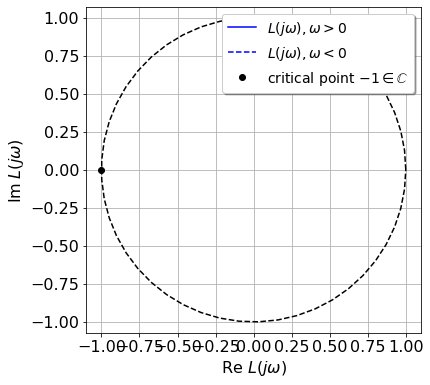

In [ ]:
Omega = L_v

abs_L = np.abs(Omega)
angle_L = np.unwrap(np.angle(Omega))*180./np.pi

circle = np.exp(1.j*np.linspace(0.,2*np.pi))

axs = []

plt.figure(figsize=(6,6))
ax = plt.subplot(1,1,1); ax.grid('on'); ax.axis('equal')
# Omega, i.e. graph of L(j omega)
ax.plot(Omega.real,Omega.imag,'b-',label=r'$L(j\omega), \omega > 0$')
ax.plot(Omega.real,-Omega.imag,'b--',label=r'$L(j\omega), \omega < 0$')
# unit circle
ax.plot(circle.real,circle.imag,'k--')
# critical point (-1. + 0.j)
ax.plot(-1.,0.,'ko',label=r'critical point $-1\in\mathbb{C}$')
# legend and labels
ax.legend(fontsize=14,frameon=True,shadow=True)
ax.set_xlabel(r'$\operatorname{Re}\ L(j\omega)$')
ax.set_ylabel(r'$\operatorname{Im}\ L(j\omega)$');
axs.append(ax)

for ax in axs:
  for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
               ax.get_xticklabels() + ax.get_yticklabels()):
      item.set_fontsize(16)

***Hint:*** according to [this paper](http://doi.org/10.1109/TAC.1977.1101470), linear-quadratic regulators always have infinite positive gain margins and phase margins of at least $\pm 60^\circ$ when using full-state feedback.